# Imports

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('dataSets/damCombustible_cleaned.csv')

df.head()

,Nro.,Vehículo,Odómetro,Horómetro,Fecha,Tanqueo Full,Costo por Volumen,Cant.,Unidad,Costo Total,Tipo,Unnamed: 11
0,634,101,1086986,NaN,06/ago./2024 17:33:18,S,"24,95",20,Litros,499,DIESEL,NaN
1,633,101,1086986,NaN,06/ago./2024 17:29:56,S,"25,38",394,Litros,9999,DIESEL,NaN
2,637,102,1023146,NaN,06/ago./2024 6:23:00,S,"24,57",127,Litros,3120,DIESEL,NaN
3,638,110,595357,NaN,06/ago./2024 3:51:00,S,"25,51",196,Litros,5000,DIESEL,NaN
4,636,105,492843,NaN,05/ago./2024 23:00:00,S,"24,57",127,Litros,3120,DIESEL,NaN


In [81]:
print(df['Vehículo'].isna().sum())
print(df['Odómetro'].isna().sum())
print(df['Cant.'].isna().sum())

0
0
0


# Transformación de los datos

Separamos las columnas a usar y las convertimos a int

- Odómetro
- Cantidad
- Vehículo

In [82]:
# Convertir 'Odómetro' y 'Cant.' a numérico, reemplazando las comas y valores nulos
df['Odómetro'] = pd.to_numeric(df['Odómetro'], errors='coerce')
df['Cant.'] = df['Cant.'].str.replace(',', '').astype(float)

# Convertir 'Vehículo' a un formato numérico
df['Vehículo'] = df['Vehículo'].astype('category').cat.codes

# Dropeamos columnas que no se usan
df = df.drop(columns=['Nro.', 'Horómetro', 'Fecha', 'Tanqueo Full', 'Costo por Volumen', 'Unidad', 'Costo Total', 'Tipo', 'Unnamed: 11'])

# Mostrar el DataFrame transformado
print(df.head())


   Vehículo  Odómetro  Cant.
0         0   1086986   20.0
1         0   1086986  394.0
2         1   1023146  127.0
3         9    595357  196.0
4         4    492843  127.0


## Normalizamos

In [83]:
scaler = MinMaxScaler()

# Normalizar las columnas 'Odómetro' y 'Cant.'
df[['Odómetro', 'Cant.']] = scaler.fit_transform(df[['Odómetro', 'Cant.']])

print(df.head())

   Vehículo  Odómetro     Cant.
0         0  0.921084  0.000174
1         0  0.921084  0.009449
2         1  0.830670  0.002827
3         9  0.224808  0.004538
4         4  0.079621  0.002827


## Cambiamos nombres

In [84]:
df = df.rename(columns={'Vehículo':'vehicle','Odómetro': 'odometer', 'Cant.': 'quantity'})
df

,vehicle,odometer,quantity
0,0,0.921084,0.000174
1,0,0.921084,0.009449
2,1,0.830670,0.002827
3,9,0.224808,0.004538
4,4,0.079621,0.002827
...,...,...,...
627,6,0.918250,0.096573
628,8,0.132618,0.092778
629,8,0.132618,0.009598
630,9,0.172328,0.099003


# Entrenamiento

## Separamos independiente de dependientes

In [85]:
# Variables independientes
x = df[['odometer', 'quantity']]

# Variable dependiente
y = df['vehicle']


## Separamos train y test - 90% - 10%

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

## Usamos Random Forest Classifier

In [87]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

# Realizamos un análisis de los resultados para compararlos con mi modelo

## Vemos los resultados del train

In [88]:
y_train_pred = model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
report_train = classification_report(y_train, y_train_pred)

print(f'Precisión: {accuracy_train}')
print("-------------------------")
print('Matriz de Confusión:\n', confusion_matrix_train)
print("-------------------------")
print('Reporte de Clasificación:\n', report_train)

Precisión: 1.0
-------------------------
Matriz de Confusión:
 [[54  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 85  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 57  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 51  0  0]
 [ 0  0  0  0  0  0  0  0 62  0]
 [ 0  0  0  0  0  0  0  0  0 60]]
-------------------------
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        57
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        51
           8       1.00      1.00      1.00        62
           9

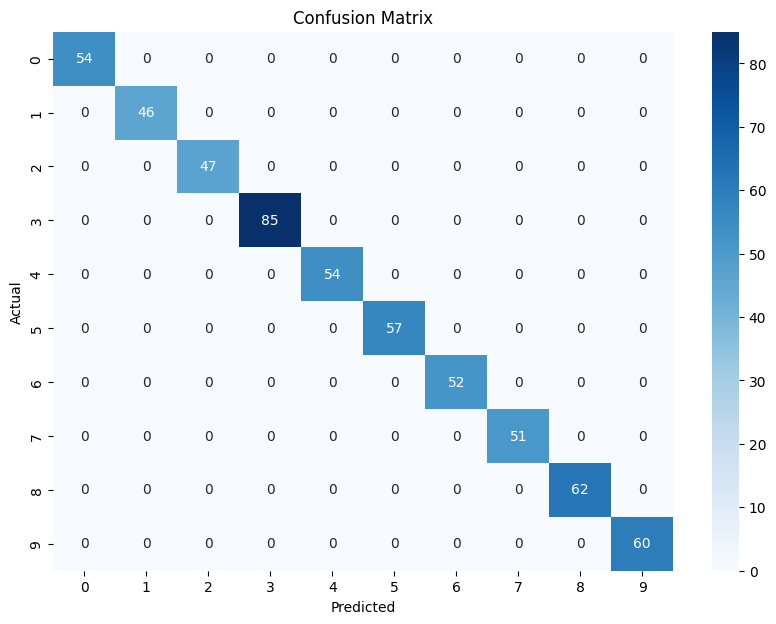

In [91]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Vemos los resultados del test

In [89]:
y_test_pred = model.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)

print(f'Precisión: {accuracy_train}')
print("-------------------------")
print('Matriz de Confusión:\n', confusion_matrix_test)
print("-------------------------")
print('Reporte de Clasificación:\n', report_test)

Precisión: 1.0
-------------------------
Matriz de Confusión:
 [[7 0 0 0 0 0 0 0 0 0]
 [0 4 0 2 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 2 0 6 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [1 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 6 3]
 [0 0 0 0 0 0 0 0 0 5]]
-------------------------
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.67      0.67      0.67         6
           2       1.00      1.00      1.00         5
           3       0.75      0.75      0.75         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      0.83      0.91         6
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         9
           9       0.62      1.00      0.77         5

    accuracy                           0.88        64
   

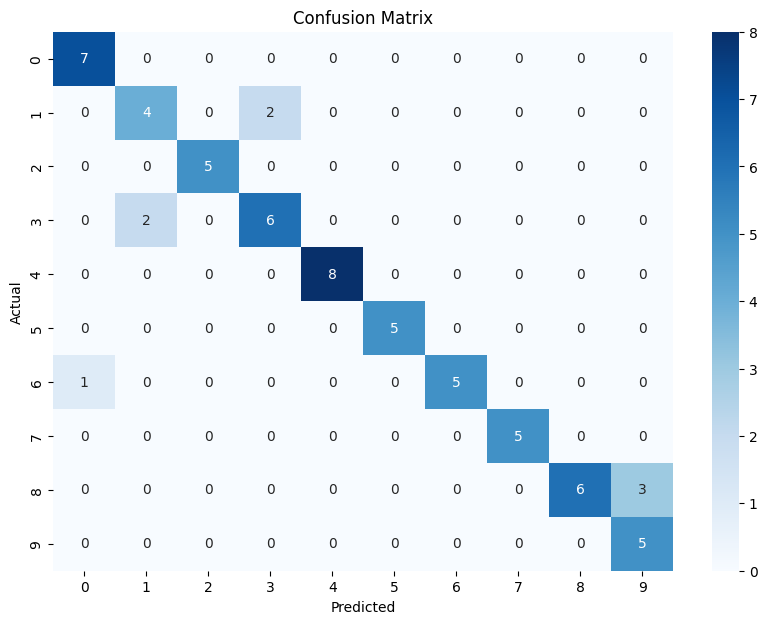

In [90]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()